# Task 1.1: Deriving the Objective Function for Logistic Regression Using MLE

## 1. Logistic Regression Setup
Logistic Regression models the probability of a binary outcome $y \in \{0,1\}$ given features $X$ and parameters $\theta$:
$
P(y_i = 1 \mid \mathbf{x}_i; \theta) = \sigma(\mathbf{x}_i \theta), 
$
where the sigmoid function $\sigma(z)$ is defined as:
$
\sigma(z) = \frac{1}{1 + e^{-z}}.
$
Here, $\mathbf{x}_i \theta$ is often denoted as $z_i$.

---

## 2. Maximum Likelihood Estimation (MLE)

### 2.1 Likelihood Function
Given a dataset $\{(\mathbf{x}_i, y_i)\}_{i=1}^n$, the likelihood function is the product of probabilities for each observed label:
$
L(\theta) = \prod_{i=1}^n P(y_i = 1 \mid \mathbf{x}_i; \theta)^{y_i} \bigl[1 - P(y_i = 1 \mid \mathbf{x}_i; \theta)\bigr]^{(1 - y_i)}.
$
Since $P(y_i = 1 \mid \mathbf{x}_i; \theta) = \sigma(z_i)$, we can rewrite this as:
$
L(\theta) = \prod_{i=1}^n \sigma(z_i)^{y_i} \,[1 - \sigma(z_i)]^{(1-y_i)}.
$

### 2.2 Log-Likelihood Function
To simplify the product into a sum, we take the natural logarithm:
$
\ell(\theta) = \log L(\theta) = \sum_{i=1}^n \Bigl[y_i \log(\sigma(z_i)) + (1 - y_i) \log\bigl(1 - \sigma(z_i)\bigr)\Bigr].
$

### 2.3 MLE Objective: Negative Log-Likelihood
MLE seeks to find $\theta$ that **maximizes** $\ell(\theta)$. Equivalently, we **minimize** the negative log-likelihood:
$
J(\theta) = -\ell(\theta) = - \sum_{i=1}^n \Bigl[y_i \log(\sigma(z_i)) + (1 - y_i) \log\bigl(1 - \sigma(z_i)\bigr)\Bigr].
$
Often, we take the average over $n$:
$
J(\theta) = -\frac{1}{n}\sum_{i=1}^n \Bigl[y_i \log(\sigma(z_i)) + (1 - y_i) \log\bigl(1 - \sigma(z_i)\bigr)\Bigr].
$
Minimizing $J(\theta)$ is equivalent to maximizing the likelihood and is the standard **cross-entropy loss** in logistic regression.

---

## 3. Maximum a Posteriori (MAP) Technique

### 3.1 Incorporating Priors
Whereas MLE focuses on maximizing $P(X, y \mid \theta)$ alone, **MAP** estimation considers both the likelihood and a prior distribution over $\theta$. By Bayes' theorem:
$
P(\theta \mid X, y) \propto P(X, y \mid \theta) \, P(\theta).
$
The MAP estimate maximizes the posterior:
$
\hat{\theta}_{\text{MAP}} = \arg\max_{\theta} P(\theta \mid X, y) = \arg\max_{\theta} \bigl[P(X, y \mid \theta)\, P(\theta)\bigr].
$

### 3.2 MAP Objective Function
Taking the negative log:
$
-\log P(\theta \mid X, y) = -\log P(X, y \mid \theta) - \log P(\theta) + \text{constant}.
$
Hence, the MAP objective often looks like:
$
J_{\text{MAP}}(\theta) = -\sum_{i=1}^n \Bigl[y_i \log(\sigma(z_i)) + (1 - y_i)\log(1-\sigma(z_i))\Bigr] - \log P(\theta).
$
In practice, a common prior for $\theta$ is a Gaussian $\mathcal{N}(\mathbf{0}, \sigma^2 I)$, which leads to an L2 regularization term. Thus, **MAP** can be seen as MLE with an added regularization (penalty) term derived from $-\log P(\theta)$.

### 3.3 Key Differences Between MLE and MAP
1. **Use of Prior**:
   - MLE does *not* incorporate any prior information about $\theta$.
   - MAP includes a prior $P(\theta)$, influencing the solution and reducing overfitting.
2. **Regularization**:
   - MLE can overfit when $n$ is small or features are numerous.
   - MAP naturally provides regularization (e.g., L2) when priors like Gaussian are used.
3. **Interpretation**:
   - MLE: $\hat{\theta}_{\text{MLE}} = \arg\max_{\theta} P(X,y \mid \theta)$.
   - MAP: $\hat{\theta}_{\text{MAP}} = \arg\max_{\theta} [P(X,y \mid \theta)\,P(\theta)]$.

---

## 4. Conclusion
- **MLE** derives the **cross-entropy loss** for logistic regression, focusing on the likelihood only.
- **MAP** extends this by introducing a prior on $\theta$. In practice, this prior often shows up as a regularization term in the loss function.

---

## 5. References
https://sassafras13.github.io/MLEvsMAP/

# Task 1.2: Defining a Machine Learning Problem for Logistic Regression

## Problem Definition

I have a personal interest in breast cancer diagnosis, as several people I know have been affected by this disease. I aim to develop a **predictive model** that classifies breast tumors as either malignant (cancerous) or benign (non-cancerous) based on measurable characteristics (e.g., tumor radius, texture, and perimeter). A commonly used dataset is the Wisconsin Breast Cancer dataset from the UCI Machine Learning Repository, which contains such diagnostic features. Accurate classification in this context is crucial for **early detection** and improving patient outcomes

---

## Justification for Logistic Regression
1. **Binary Classification**: Logistic regression is inherently suited for binary outcomes, which suits a malignant vs. benign classification task.
2. **Interpretability**: The model provides clear insights into how each feature influences the probability of malignancy, which is valuable for medical decision-making.
3. **Efficiency**: Given the dataset's size and feature set, logistic regression offers a balance between computational efficiency and predictive performance.

---

## Comparison to Another Linear Model: Linear Discriminant Analysis
1. **Logistic Regression**:
   - Models the probability of class membership directly.
   - Does not assume equal covariance among classes, making it more flexible when this assumption is violated.

2. **Linear Discriminant Analysis (LDA)**:
   - Assumes normal distribution of predictors and equal covariance matrices for classes.
   - Can be more effective when its assumptions hold true but may underperform if these assumptions are violated.

In this context, logistic regression is preferred due to its fewer assumptions about the underlying data distribution, providing robustness given the dataset's characteristics.

---

## References
- Raudys, S., & Jain, A. K. (1991). Small sample size effects in statistical pattern recognition: Recommendations for practitioners. *IEEE Transactions on Pattern Analysis and Machine Intelligence*, 13(3), 252–264. [https://doi.org/10.1109/34.75512](https://doi.org/10.1109/34.75512)
- Ng, A. Y., & Jordan, M. I. (2002). On Discriminative vs. Generative Classifiers: A comparison of logistic regression and naive Bayes. *Advances in Neural Information Processing Systems (NIPS)*. https://papers.nips.cc/paper_files/paper/2001/hash/7b7a53e239400a13bd6be6c91c4f6c4e-Abstract.html


# Task 1.3: Correspondence of Dataset to Logistic Regression Variables

## Correspondence of Dataset to Logistic Regression Equations
The [Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) is well-suited for logistic regression as its structure directly aligns with the variables in the equations derived in **Task 1.1**. Here's how the dataset corresponds:

1. **Features ($X$)**:
   - The dataset includes 30 numerical features for each tumor instance, representing physical characteristics of cell nuclei observed in digitized images. These features form the input matrix $X$, where each row corresponds to an instance and each column corresponds to a feature.
   - In logistic regression, $X \theta$ represents the linear combination of these features weighted by their corresponding coefficients $\theta$.

2. **Target Variable ($y$)**:
   - The target variable $y$ is binary, indicating whether a tumor is malignant ($y = 1$) or benign ($y = 0$). This aligns perfectly with the logistic regression setup, where $P(y = 1 \mid X; \theta)$ predicts the probability of a tumor being malignant.

3. **Sigmoid Transformation ($\sigma(z)$)**:
   - The output of the linear combination $z = X \theta$ is passed through the sigmoid function $\sigma(z) = \frac{1}{1 + e^{-z}}$ to ensure that the model predicts probabilities in the range [0, 1]. These probabilities allow for a threshold-based classification into malignant or benign categories.

---

## Assumptions in Derivation
1. **Independence of Observations**:
   - The derivation of the likelihood function assumes that each tumor instance in the dataset is independent of others. This assumption holds for this dataset, as each tumor's characteristics are measured independently.

2. **Linearity in the Log-Odds**:
   - Logistic regression assumes that the log-odds of the target variable are a linear function of the features, i.e., $\log \frac{P(y=1)}{P(y=0)} = X \theta$. This assumption implies that the relationship between features and the target is additive and proportional, which is reasonable for this dataset given the numerical nature of the features.

3. **No Perfect Multicollinearity**:
   - Logistic regression assumes that no feature in $X$ is a perfect linear combination of others. While multicollinearity may exist in this dataset (e.g., due to relationships between size and texture features), it can be addressed using techniques like Variance Inflation Factor (VIF) analysis or dimensionality reduction.

4. **Binary Target Variable**:
   - The derivation of the cross-entropy loss function relies on a binary target variable. This is satisfied here, as the dataset's target variable has only two categories: malignant and benign.

---

## Conclusion
The dataset's structure, including numerical features and a binary target variable, aligns directly with the variables and assumptions of logistic regression. Any potential challenges, such as multicollinearity, can be addressed during preprocessing to ensure the model's assumptions remain valid.


# Task 2.1: Selected Dataset

As stated above the dataset I have selected is the  [Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

# Task 2.1: EDA

Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal Dimension SE       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
dtype: int64
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Da

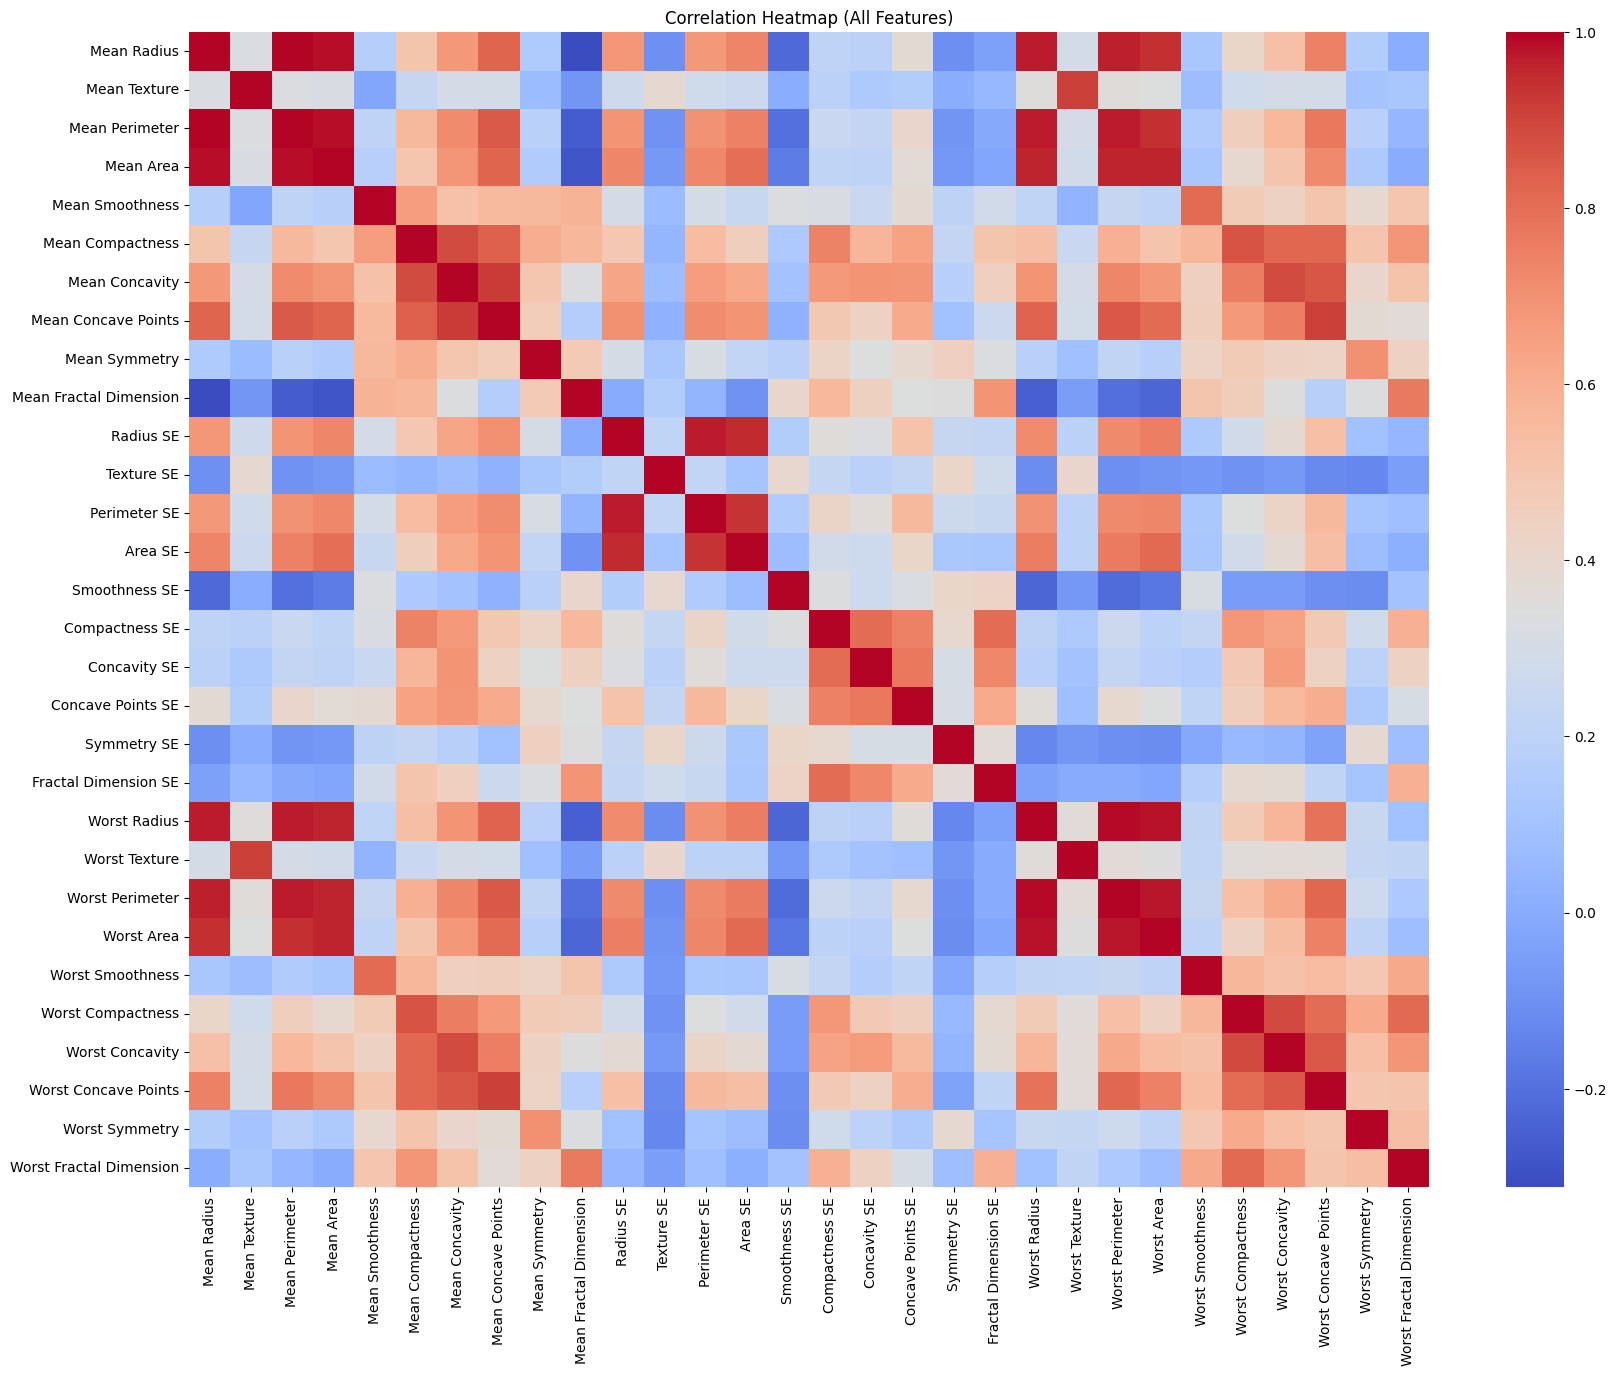


Variance Inflation Factor (VIF) for each feature:
                    Feature          VIF
0               Mean Radius  3806.115296
2            Mean Perimeter  3786.400419
20             Worst Radius   799.105946
22          Worst Perimeter   405.023336
3                 Mean Area   347.878657
23               Worst Area   337.221924
10                Radius SE    75.462027
6            Mean Concavity    70.767720
12             Perimeter SE    70.359695
7       Mean Concave Points    60.041733
5          Mean Compactness    50.505168
13                  Area SE    41.163091
25        Worst Compactness    36.982755
27     Worst Concave Points    36.763714
26          Worst Concavity    31.970723
29  Worst Fractal Dimension    18.861533
21            Worst Texture    18.569966
9    Mean Fractal Dimension    15.756977
16             Concavity SE    15.694833
15           Compactness SE    15.366324
1              Mean Texture    11.884048
17        Concave Points SE    11.520796
24    

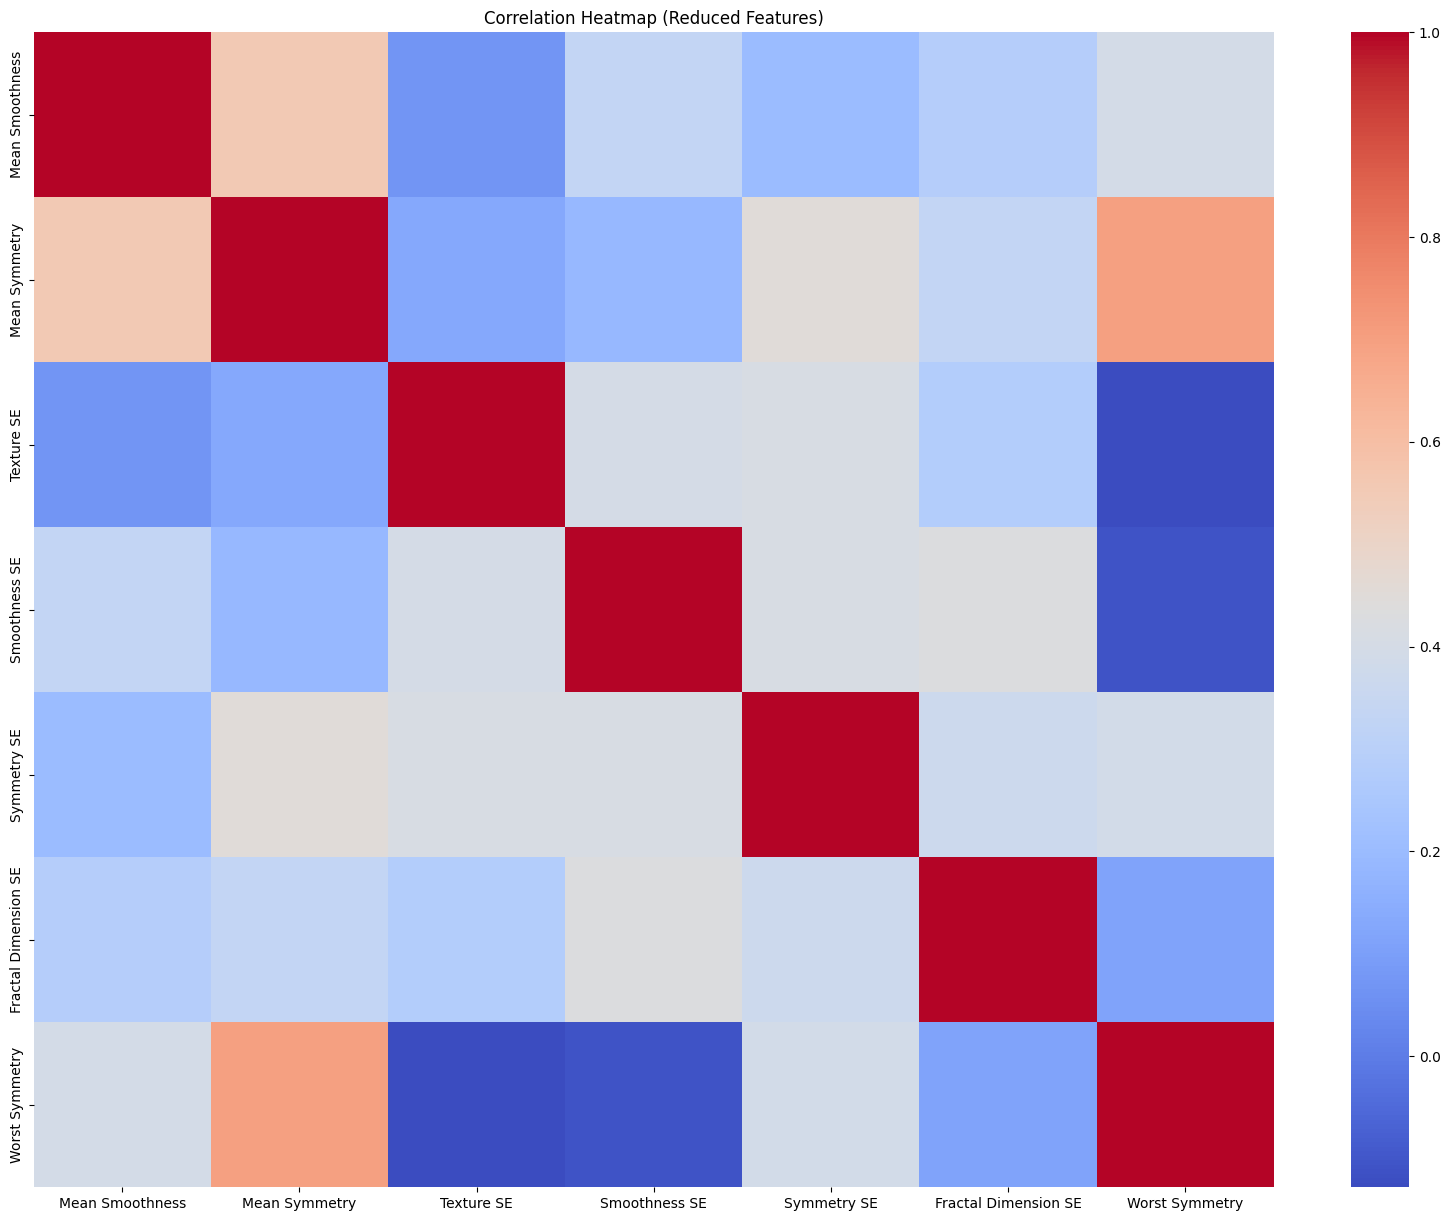


Remaining features after removing highly correlated ones:
Index(['Diagnosis', 'Mean Smoothness', 'Mean Symmetry', 'Texture SE',
       'Smoothness SE', 'Symmetry SE', 'Fractal Dimension SE',
       'Worst Symmetry'],
      dtype='object')


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = [
    'ID', 'Diagnosis',
    'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness',
    'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
    'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE', 'Compactness SE', 
    'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
    'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 'Worst Smoothness',
    'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry', 
    'Worst Fractal Dimension'
]
data = pd.read_csv(url, header=None, names=columns)

# Basic Cleaning
data.drop(columns=['ID'], inplace=True) # ID is irrelevant for classification
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0}) 

# Check missing values
print(data.isna().sum())

# Quick EDA
print("Dataset info:")
print(data.info())

print("\nClass distribution (0=Benign, 1=Malignant):")
print(data['Diagnosis'].value_counts())

# Correlation Heatmap (All Features)
plt.figure(figsize=(20, 15))
sns.heatmap(data.iloc[:, 1:].corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap (All Features)')
plt.show()

# VIF Calculation
features = data.iloc[:, 1:]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features_scaled, i) for i in range(features_scaled.shape[1])]

print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data.sort_values(by="VIF", ascending=False))

# Drop Features with High VIF
# A VIF threshold of > 10 often indicates problematic multicollinearity.
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
print("\nFeatures with high VIF (potential multicollinearity):")
print(high_vif_features)

data_reduced = data.drop(columns=high_vif_features)

# Recalculate VIF after dropping features
features_reduced_scaled = scaler.fit_transform(data_reduced.iloc[:, 1:])
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = data_reduced.columns[1:]
vif_data_reduced["VIF"] = [
    variance_inflation_factor(features_reduced_scaled, i) 
    for i in range(features_reduced_scaled.shape[1])
]

print("\nVIF after removing high-VIF features:")
print(vif_data_reduced.sort_values(by="VIF", ascending=False))

# New Correlation Heatmap (Reduced Features)
plt.figure(figsize=(20, 15))
sns.heatmap(data_reduced.iloc[:, 1:].corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap (Reduced Features)')
plt.show()

print("\nRemaining features after removing highly correlated ones:")
print(data_reduced.columns)


# Task 2.3: More Data Visualization

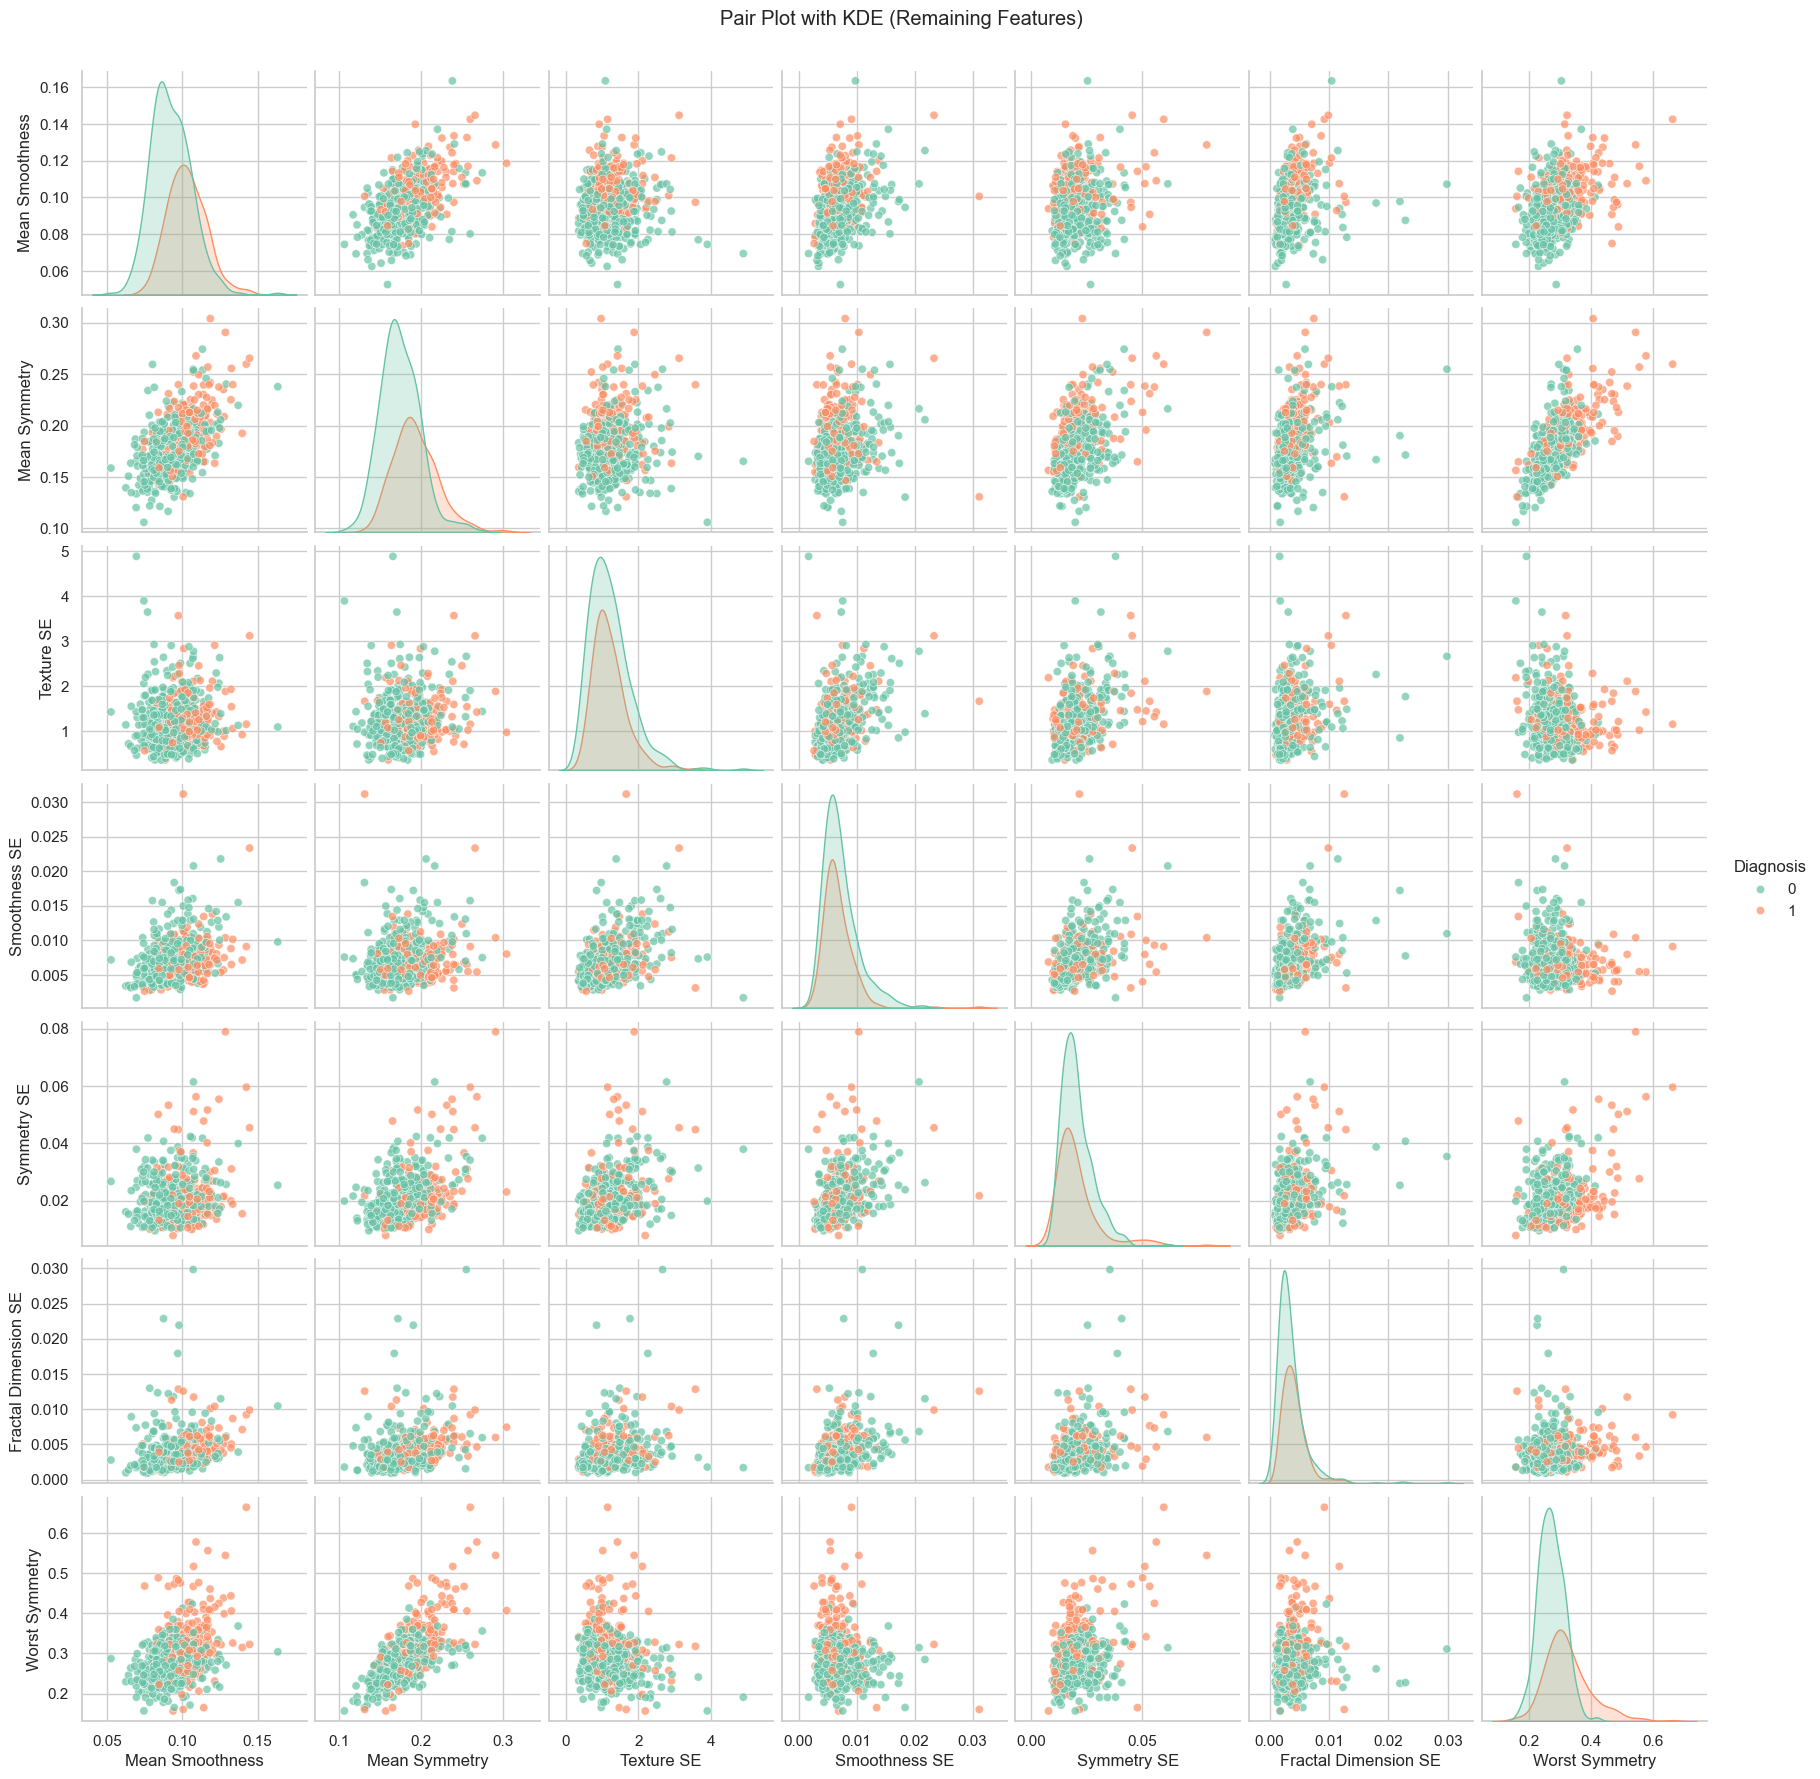

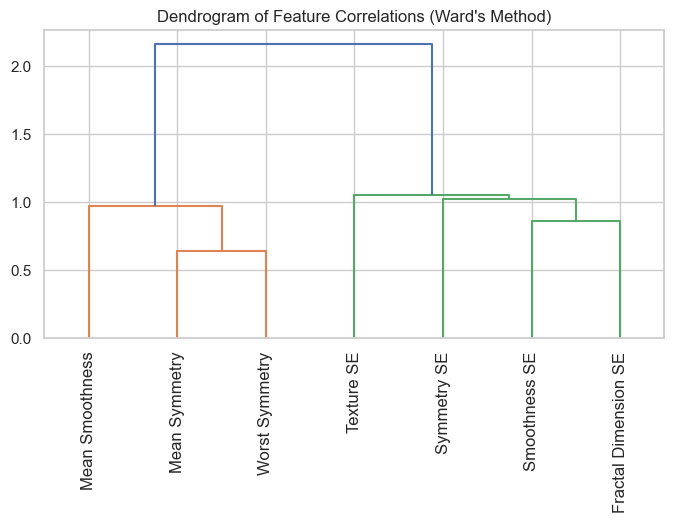

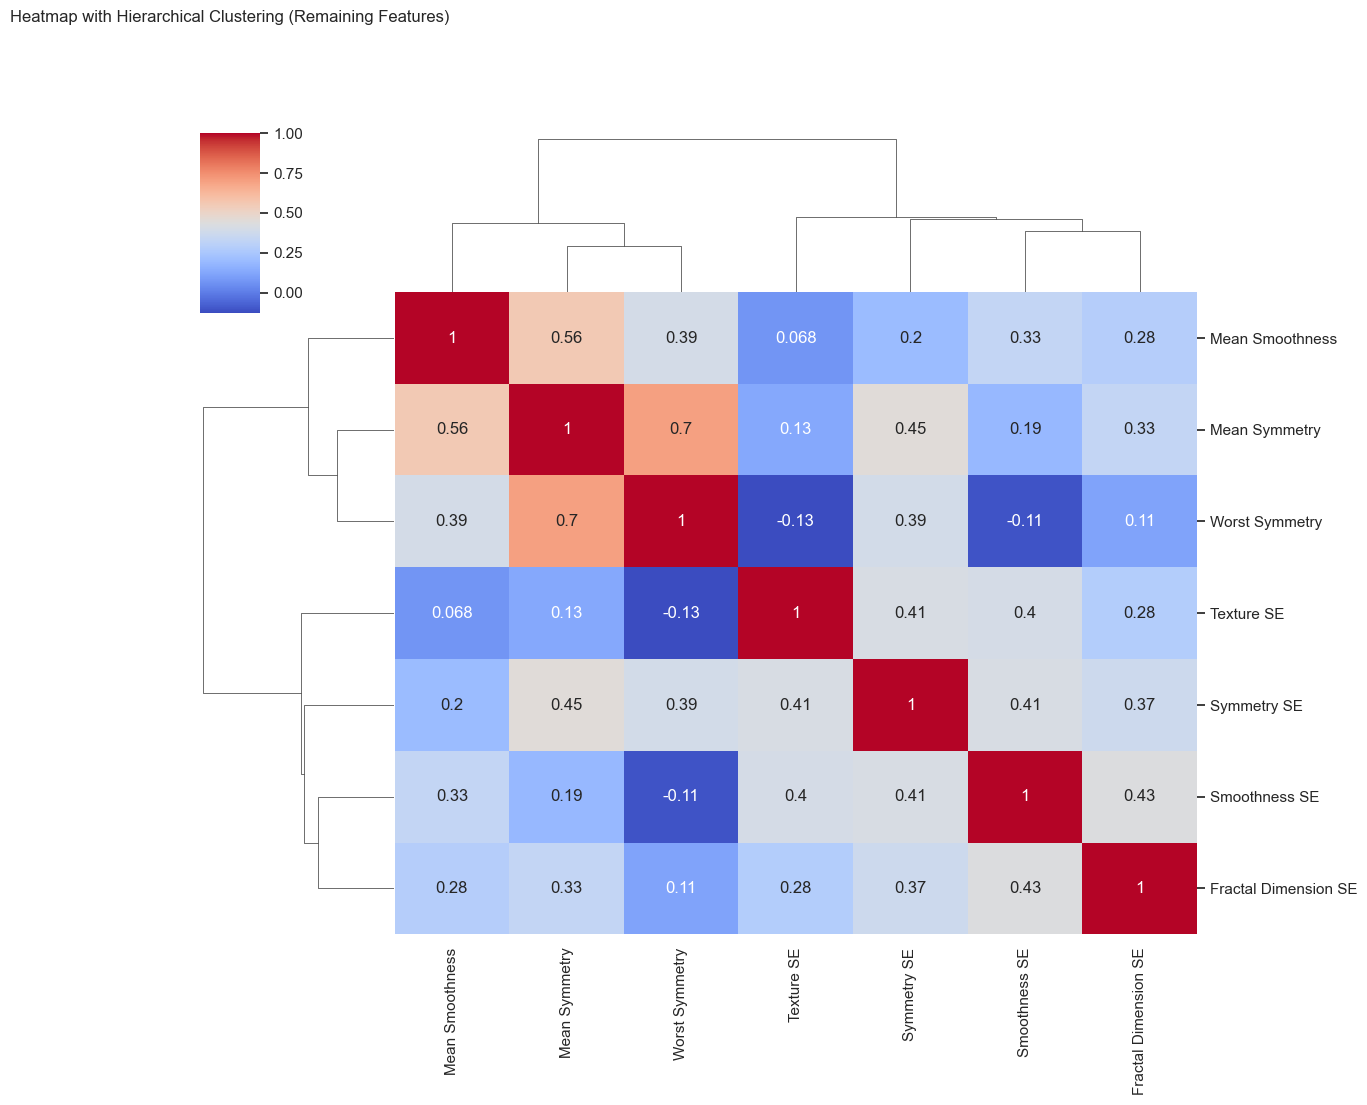

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Define remaining features for visualization
remaining_features = [
    'Mean Smoothness', 'Mean Symmetry', 'Texture SE',
    'Smoothness SE', 'Symmetry SE', 'Fractal Dimension SE', 'Worst Symmetry'
]

# Add the target variable back for visualization
visualization_data = data[['Diagnosis'] + remaining_features]

# Pair Plot with KDE for Remaining Features
sns.set(style="whitegrid")
pairplot = sns.pairplot(
    visualization_data, 
    hue='Diagnosis', 
    diag_kind='kde', 
    palette='Set2',   
    plot_kws={'alpha': 0.7} 
)
pairplot.fig.suptitle("Pair Plot with KDE (Remaining Features)", y=1.02)
plt.show()

# Hierarchical Clustering Heatmap
# Compute the correlation matrix for the remaining features
correlation_matrix = visualization_data[remaining_features].corr()

# Perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(correlation_matrix, method='ward')

# Plot dendrogram separately
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix, labels=correlation_matrix.index, leaf_rotation=90)
plt.title("Dendrogram of Feature Correlations (Ward's Method)")
plt.show()

# Plot the clustered heatmap
cluster_grid = sns.clustermap(
    correlation_matrix,
    method='ward',
    cmap='coolwarm',
    figsize=(12, 10),
    annot=True,
    cbar=True
)
plt.title("Heatmap with Hierarchical Clustering (Remaining Features)", pad=80)
plt.show()



# Task 3.1: Logistic Regression from Scratch

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None  # Model weights
    
    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))
    
    def compute_cost(self, X, y):
        """Compute the cost function (cross-entropy loss)."""
        m = X.shape[0]
        h = self.sigmoid(np.dot(X, self.theta))
        cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    
    def fit(self, X, y):
        """Train the logistic regression model using gradient descent."""
        m, n = X.shape
        # Initialize weights (theta) to zeros
        self.theta = np.zeros((n, 1))
        
        # Reshape y to be a column vector
        y = y.reshape(m, 1)
        
        for i in range(self.num_iterations):
            # Compute predictions
            h = self.sigmoid(np.dot(X, self.theta))
            
            # Compute the gradient
            gradient = (1 / m) * np.dot(X.T, (h - y))
            
            # Update weights
            self.theta -= self.learning_rate * gradient
            
            # Print cost every 100 iterations
            if i % 100 == 0:
                cost = self.compute_cost(X, y)
                print(f"Iteration {i} | Cost: {cost:.4f}")
    
    def predict(self, X, threshold=0.5):
        """Predict binary class labels."""
        probabilities = self.sigmoid(np.dot(X, self.theta))
        return (probabilities >= threshold).astype(int)

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = [
    'ID', 'Diagnosis',
    'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness',
    'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
    'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE', 'Compactness SE', 
    'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
    'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 'Worst Smoothness',
    'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry', 
    'Worst Fractal Dimension'
]
data = pd.read_csv(url, header=None, names=columns)
data.drop(columns=['ID'], inplace=True)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# we previously identified certain high-VIF features and removed them
reduced_features = [
    'Mean Smoothness', 'Mean Symmetry', 'Texture SE',
    'Smoothness SE', 'Symmetry SE', 'Fractal Dimension SE', 'Worst Symmetry'
]

X = data[reduced_features].values
y = data['Diagnosis'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
lr = LogisticRegression(learning_rate=0.01, num_iterations=1000)
lr.fit(X_train, y_train)

# Evaluate
predictions = lr.predict(X_test, threshold=0.5)
accuracy = np.mean(predictions.flatten() == y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Additional metrics
cm = confusion_matrix(y_test, predictions)
cr = classification_report(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)


Iteration 0 | Cost: 0.6921
Iteration 100 | Cost: 0.6237
Iteration 200 | Cost: 0.5936
Iteration 300 | Cost: 0.5775
Iteration 400 | Cost: 0.5676
Iteration 500 | Cost: 0.5609
Iteration 600 | Cost: 0.5562
Iteration 700 | Cost: 0.5526
Iteration 800 | Cost: 0.5497
Iteration 900 | Cost: 0.5474
Model Accuracy: 62.28%

Confusion Matrix:
[[40 31]
 [12 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.56      0.65        71
           1       0.50      0.72      0.59        43

    accuracy                           0.62       114
   macro avg       0.63      0.64      0.62       114
weighted avg       0.67      0.62      0.63       114



### NOTE
The model accuracy is pretty sub-optimal, possibly due to VIF removing predictive features, just leaving for now though do not think I have time to fix, if a grader could leave a note as to what I did wrong pls lmk.

# Task 3.2 Gradient Descent Techniques

In [10]:
class LogisticRegressionGDVariants:
    def __init__(self, learning_rate=0.01, num_iterations=1000, batch_size=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.batch_size = batch_size  
        self.theta = None 
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def compute_cost(self, X, y):
        m = X.shape[0]
        h = self.sigmoid(np.dot(X, self.theta))
        cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    
    def fit(self, X, y, method="batch"):
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        y = y.reshape(m, 1)
        
        for i in range(self.num_iterations):
            if method == "batch":
                # Batch Gradient Descent
                h = self.sigmoid(np.dot(X, self.theta))
                gradient = (1 / m) * np.dot(X.T, (h - y))
            elif method == "stochastic":
                # Stochastic Gradient Descent
                for j in range(m):
                    rand_idx = np.random.randint(0, m)
                    X_j = X[rand_idx, :].reshape(1, -1)
                    y_j = y[rand_idx].reshape(1, 1)
                    h = self.sigmoid(np.dot(X_j, self.theta))
                    gradient = np.dot(X_j.T, (h - y_j))
                    self.theta -= self.learning_rate * gradient
            elif method == "mini-batch":
                # Mini-Batch Gradient Descent
                indices = np.random.permutation(m)
                X_shuffled = X[indices]
                y_shuffled = y[indices]
                for start_idx in range(0, m, self.batch_size):
                    end_idx = min(start_idx + self.batch_size, m)
                    X_batch = X_shuffled[start_idx:end_idx]
                    y_batch = y_shuffled[start_idx:end_idx]
                    h = self.sigmoid(np.dot(X_batch, self.theta))
                    gradient = (1 / X_batch.shape[0]) * np.dot(X_batch.T, (h - y_batch))
                    self.theta -= self.learning_rate * gradient
            else:
                raise ValueError("Invalid method. Choose 'batch', 'stochastic', or 'mini-batch'.")
            
            # Update weights for batch GD or mini-batch GD
            self.theta -= self.learning_rate * gradient
            
            # Print cost every 100 iterations
            if i % 100 == 0:
                cost = self.compute_cost(X, y)
                print(f"Iteration {i} | Cost: {cost:.4f} | Method: {method}")

    def predict(self, X, threshold=0.5):
        """Predict binary class labels."""
        probabilities = self.sigmoid(np.dot(X, self.theta))
        return (probabilities >= threshold).astype(int)

reduced_features = [
    'Mean Smoothness', 'Mean Symmetry', 'Texture SE',
    'Smoothness SE', 'Symmetry SE', 'Fractal Dimension SE', 'Worst Symmetry'
]

X = data[reduced_features].values
y = data['Diagnosis'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate each gradient descent variant
for method in ["batch", "stochastic", "mini-batch"]:
    print(f"\nTraining with {method.capitalize()} Gradient Descent...")
    batch_size = 32 if method == "mini-batch" else None
    lr_variant = LogisticRegressionGDVariants(learning_rate=0.01, num_iterations=1000, batch_size=batch_size)
    lr_variant.fit(X_train, y_train, method=method)
    predictions = lr_variant.predict(X_test)
    accuracy = np.mean(predictions.flatten() == y_test) * 100
    print(f"{method.capitalize()} GD Accuracy: {accuracy:.2f}%")



Training with Batch Gradient Descent...
Iteration 0 | Cost: 0.6921 | Method: batch
Iteration 100 | Cost: 0.6237 | Method: batch
Iteration 200 | Cost: 0.5936 | Method: batch
Iteration 300 | Cost: 0.5775 | Method: batch
Iteration 400 | Cost: 0.5676 | Method: batch
Iteration 500 | Cost: 0.5609 | Method: batch
Iteration 600 | Cost: 0.5562 | Method: batch
Iteration 700 | Cost: 0.5526 | Method: batch
Iteration 800 | Cost: 0.5497 | Method: batch
Iteration 900 | Cost: 0.5474 | Method: batch
Batch GD Accuracy: 62.28%

Training with Stochastic Gradient Descent...
Stochastic GD Accuracy: 69.30%

Training with Mini-batch Gradient Descent...
Mini-batch GD Accuracy: 69.30%
